# Normalising a distribution

#### Inspirations from https://chrisalbon.com/python/data_wrangling/pandas_normalize_column/ and https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

Note: few of the ideas here are experimental

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)

In [3]:
# data = {'score': [234, 24, 14, 27,-74,45,73,-18,59,160] }
num_of_points=20
scale = 0.1
centre_of_distribution = 0.0
data = {'score': np.random.normal(centre_of_distribution, scale, num_of_points) }

In [4]:
df = pd.DataFrame(data)
df

,score
0,-0.014273
1,0.019596
2,-0.080259
3,-0.029755
4,-0.094663
5,-0.057839
6,-0.019182
7,-0.076499
8,-0.021217
9,-0.076235


## Raw data

<Axes: >

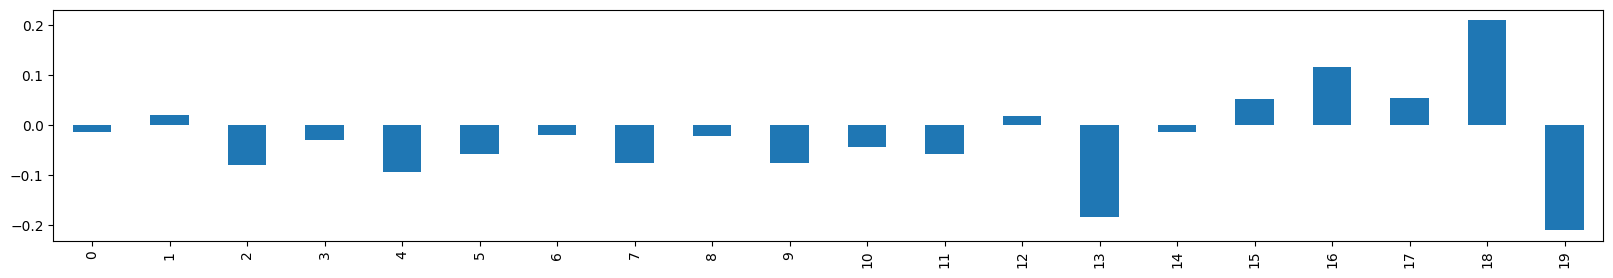

In [5]:
df['score'].plot(kind='bar')

<Axes: >

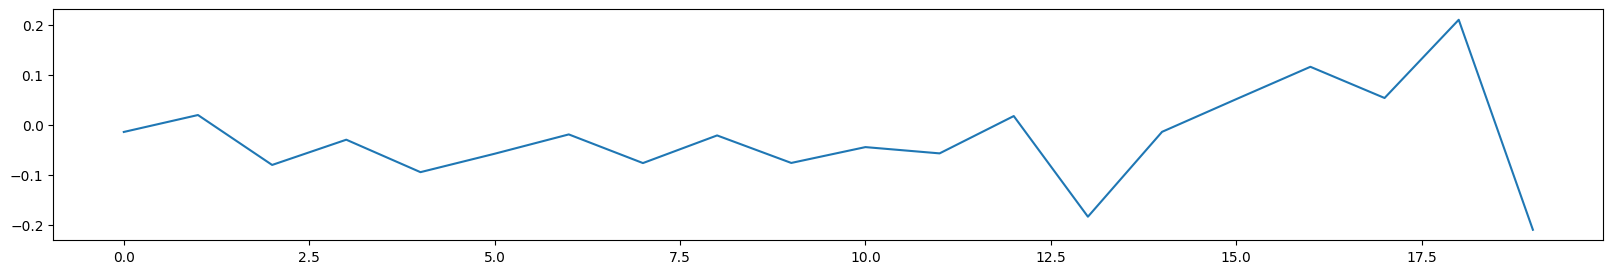

In [6]:
df['score'].plot()

In [7]:
df['score'].describe()

count    20.000000
mean     -0.025549
std       0.093572
min      -0.209913
25%      -0.076301
50%      -0.025486
75%       0.018054
max       0.210101
Name: score, dtype: float64

## Removing minimum value from all numbers (inspecting a step)

In [8]:
df['score_min_removed'] = df['score'] - df['score'].min()

<Axes: >

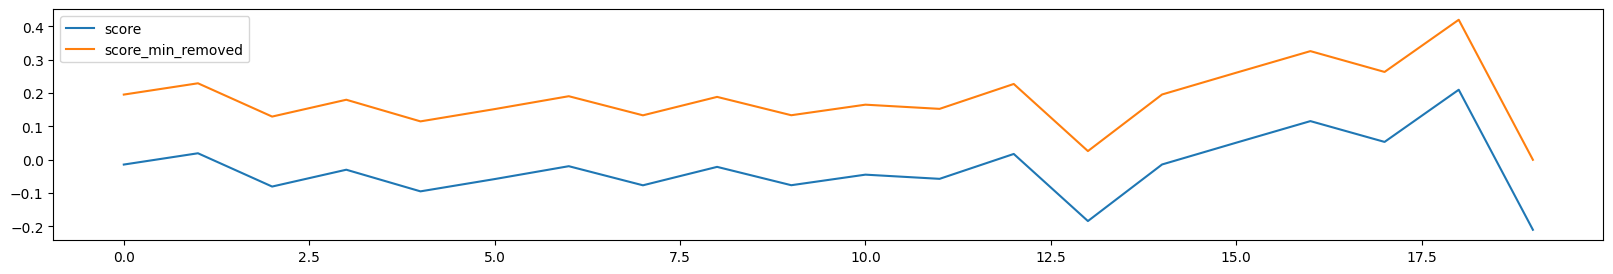

In [9]:
df[['score','score_min_removed']].plot()

#### Note: don't be surprised that the plot of `score_min_removed` looks higher on the number-line axis than `score`. `min` value is a negative number, removing a negative value from a positive value only increases the positive value i.e. `x - (-y) = x + y`

<Axes: >

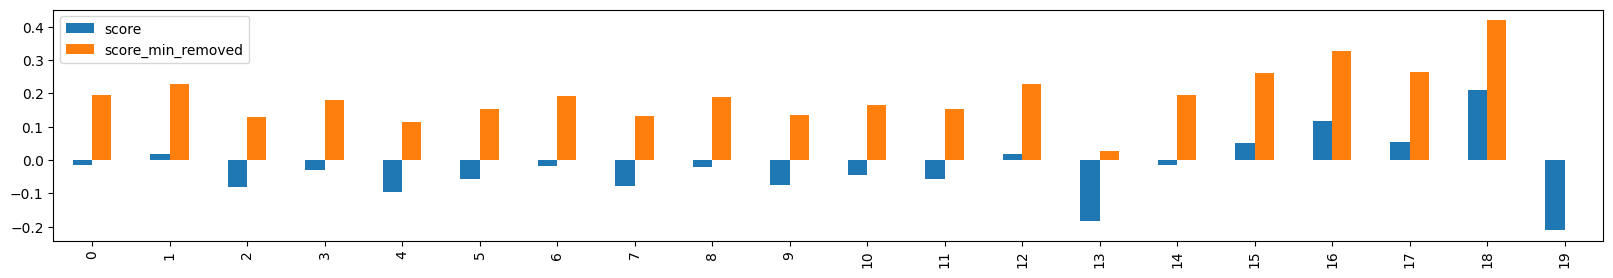

In [10]:
df[['score','score_min_removed']].plot(kind='bar')

## Removing mean from all numbers (inspecting a step)

In [11]:
df['score_mean_removed'] = df['score'] - df['score'].mean()

<Axes: >

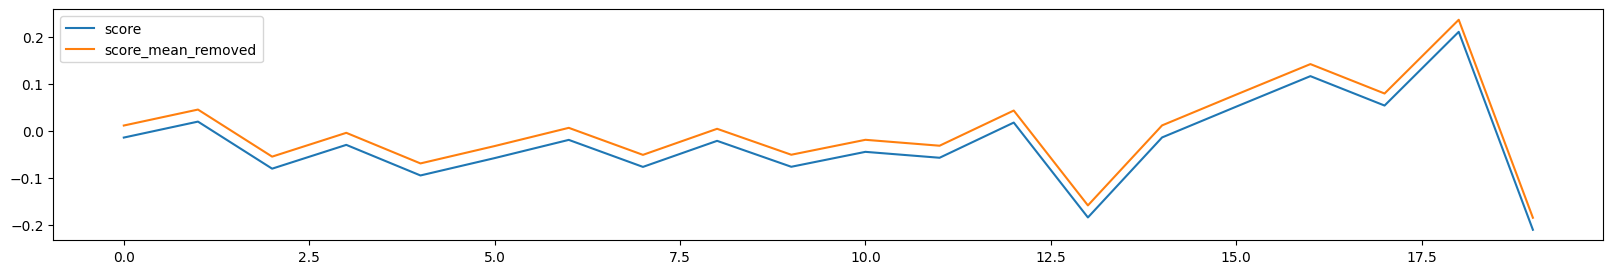

In [12]:
df[['score','score_mean_removed']].plot()

<Axes: >

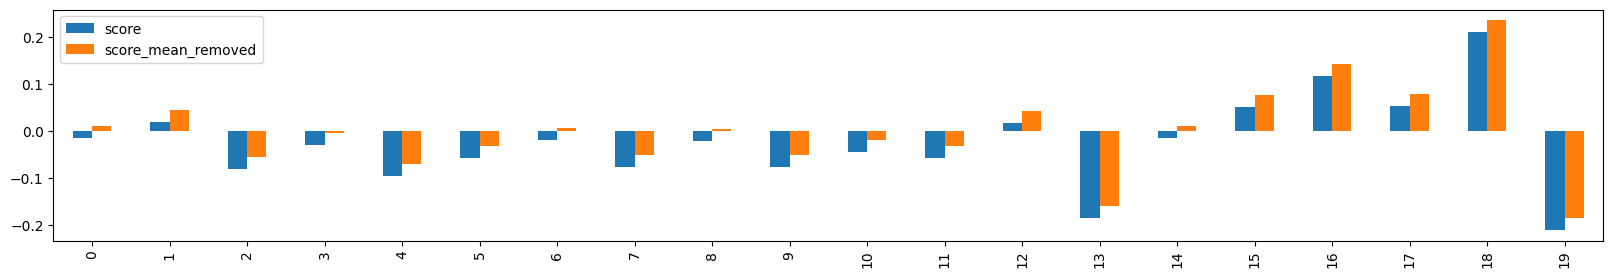

In [13]:
df[['score','score_mean_removed']].plot(kind='bar')

## Comparing: raw, minimum value removed from raw, mean removed from raw

<Axes: >

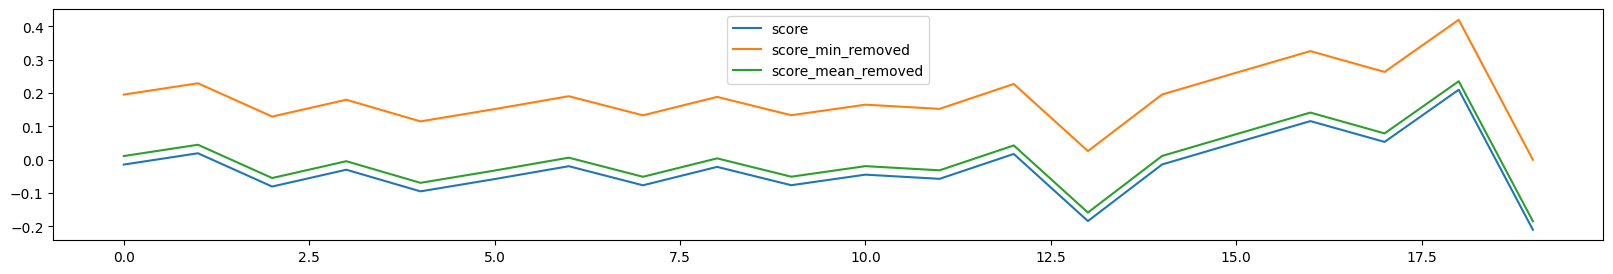

In [14]:
df[['score','score_min_removed','score_mean_removed']].plot()

<Axes: >

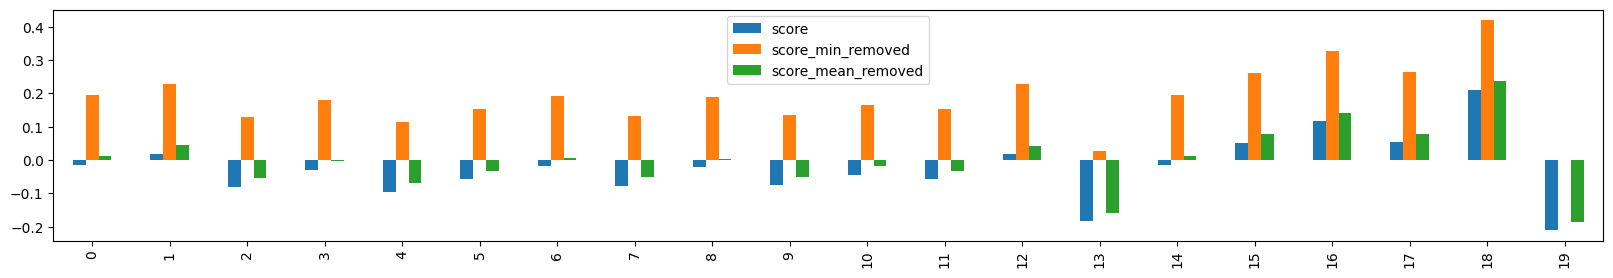

In [15]:
df[['score','score_min_removed','score_mean_removed']].plot(kind='bar')

#### Interesting to see that the plots of `score_min_removed` and `score_mean_removed` are quite close to each other

## Normalise mean (using scikit-learn's normalize function)

In [16]:
from sklearn.preprocessing import normalize

In [17]:
values = normalize(np.array(df['score']).reshape(1,-1))
print(values[0])
df['score_sklearn_normalize'] = values[0]

[-0.03369633  0.04626462 -0.18948142 -0.07024695 -0.22348877 -0.13655052
 -0.04528686 -0.18060535 -0.05009176 -0.17998062 -0.1052086  -0.1348258
  0.04140826 -0.43383734 -0.03305476  0.12120176  0.27400361  0.1266825
  0.49602328 -0.49557772]


<Axes: >

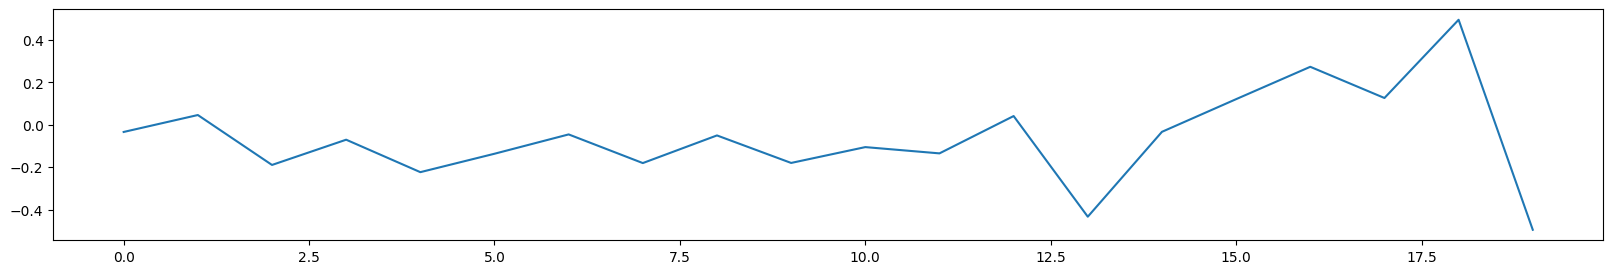

In [18]:
df['score_sklearn_normalize'].plot()

## Normalise by mean method

In [19]:
def normalise_mean(data):
    return (data - data.mean()) / data.std()

In [20]:
df['score_normalise_mean'] = normalise_mean(df['score'])
df['score_normalise_mean']

0     0.120506
1     0.482465
2    -0.584686
3    -0.044948
4    -0.738628
5    -0.345084
6     0.068039
7    -0.544507
8     0.046289
9    -0.541679
10   -0.203209
11   -0.337277
12    0.460482
13   -1.690812
14    0.123410
15    0.821683
16    1.513371
17    0.846492
18    2.518387
19   -1.970292
Name: score_normalise_mean, dtype: float64

<Axes: >

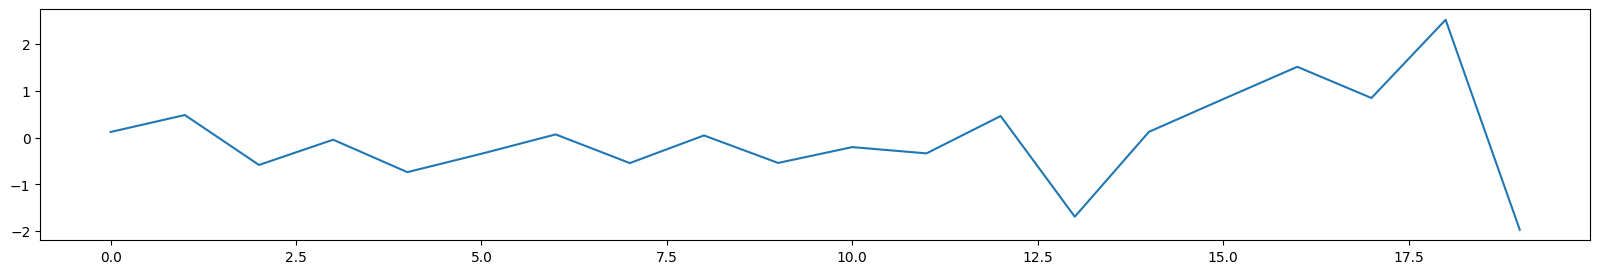

In [21]:
df['score_normalise_mean'].plot()

## Normalise by min-max method

In [22]:
def normalise_min_max(data):
    return (data - data.max()) / (data.max() - data.min())

In [23]:
df['score_normalise_min_max'] = normalise_min_max(df['score'])
df['score_normalise_min_max']

0    -0.534206
1    -0.453568
2    -0.691311
3    -0.571067
4    -0.725606
5    -0.637932
6    -0.545895
7    -0.682360
8    -0.550741
9    -0.681730
10   -0.606324
11   -0.636192
12   -0.458466
13   -0.937737
14   -0.533559
15   -0.377996
16   -0.223900
17   -0.372469
18    0.000000
19   -1.000000
Name: score_normalise_min_max, dtype: float64

<Axes: >

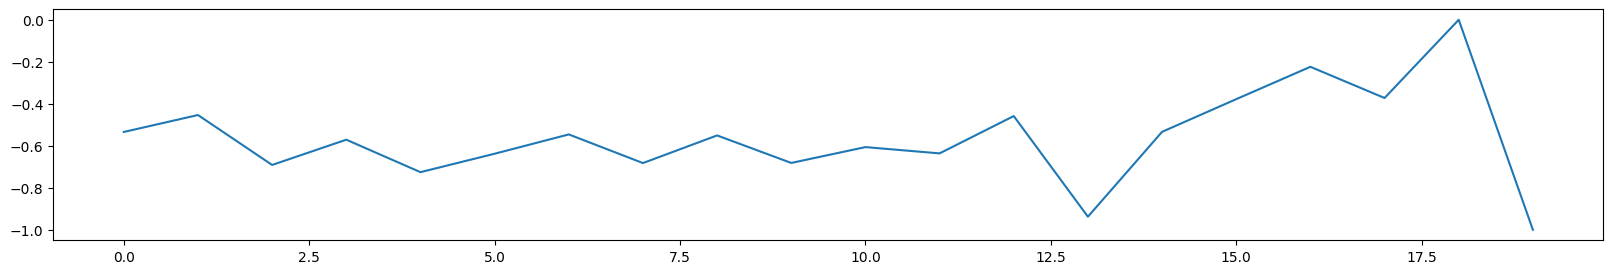

In [24]:
df['score_normalise_min_max'].plot()

In [25]:
import numpy as np

## Normalise using exp

In [26]:
df['score_exp'] = df['score'].apply(np.exp)
df['score_exp']

0     0.985829
1     1.019790
2     0.922877
3     0.970684
4     0.909679
5     0.943802
6     0.981001
7     0.926354
8     0.979006
9     0.926599
10    0.956415
11    0.944492
12    1.017694
13    0.832135
14    0.986097
15    1.052678
16    1.123063
17    1.055125
18    1.233803
19    0.810655
Name: score_exp, dtype: float64

<Axes: >

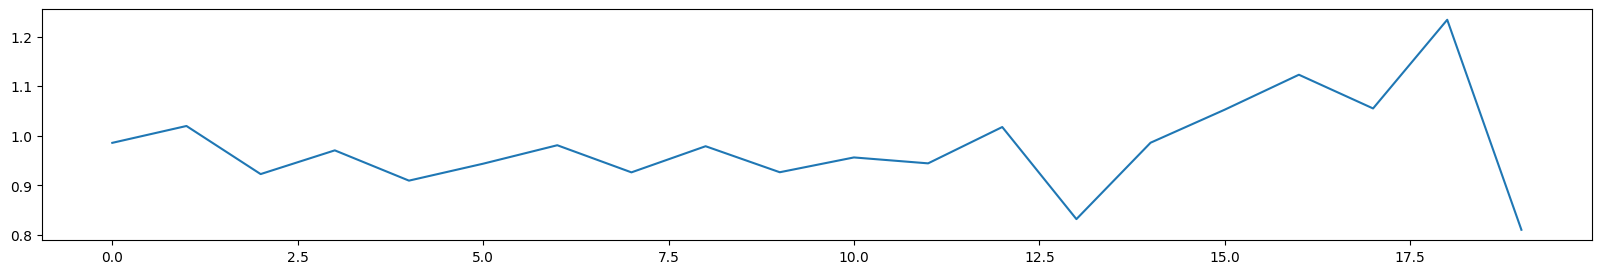

In [27]:
df['score_exp'].plot()

## Normalise using natural log (base e)

In [28]:
df['score_log_base_e'] = df['score'].apply(np.log)
df['score_log_base_e']

0          NaN
1    -3.932411
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12   -4.043308
13         NaN
14         NaN
15   -2.969332
16   -2.153647
17   -2.925104
18   -1.560165
19         NaN
Name: score_log_base_e, dtype: float64

<Axes: >

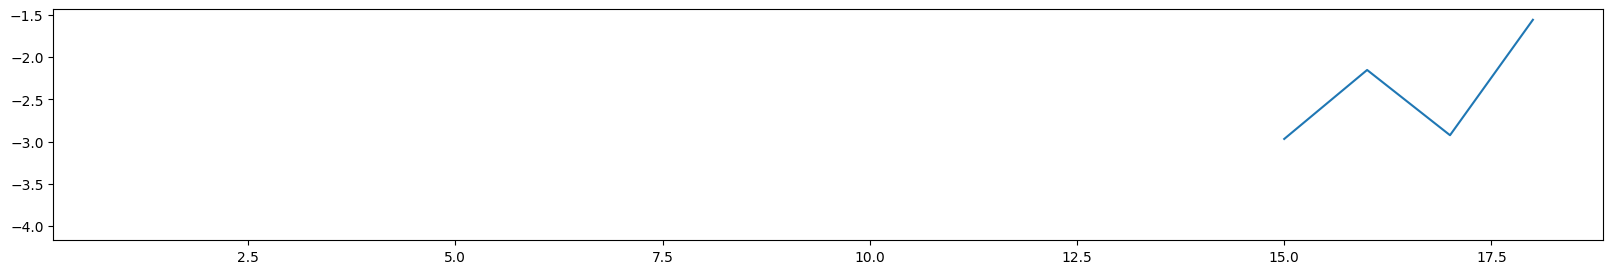

In [29]:
df['score_log_base_e'].plot()

## Normalise using log (base 10)

In [30]:
df['score_log_base_10'] = df['score'].apply(np.log10)
df['score_log_base_10']

0          NaN
1    -1.707824
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12   -1.755986
13         NaN
14         NaN
15   -1.289564
16   -0.935317
17   -1.270357
18   -0.677571
19         NaN
Name: score_log_base_10, dtype: float64

<Axes: >

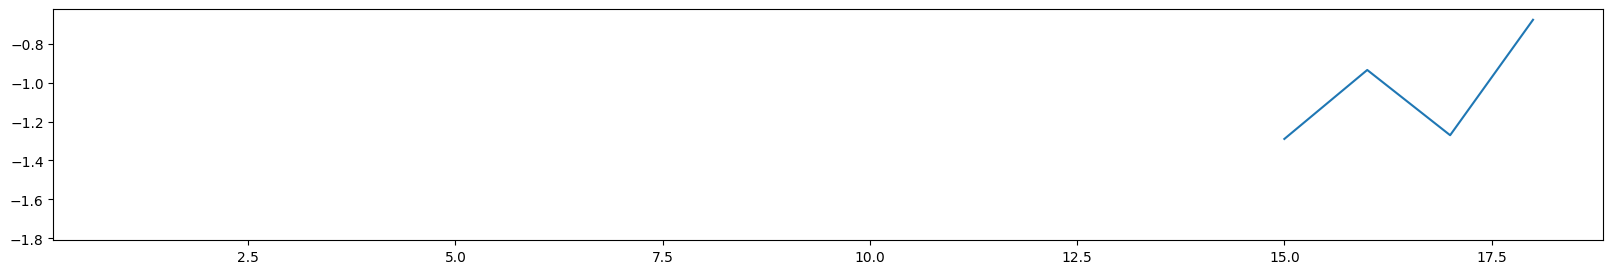

In [31]:
df['score_log_base_10'].plot()

## Comparing all Normalise actions together (mean, min-max, scikitlearn normalize, exp, log base e, log base 10)

In [32]:
df.columns

Index(['score', 'score_min_removed', 'score_mean_removed',
       'score_sklearn_normalize', 'score_normalise_mean',
       'score_normalise_min_max', 'score_exp', 'score_log_base_e',
       'score_log_base_10'],
      dtype='object')

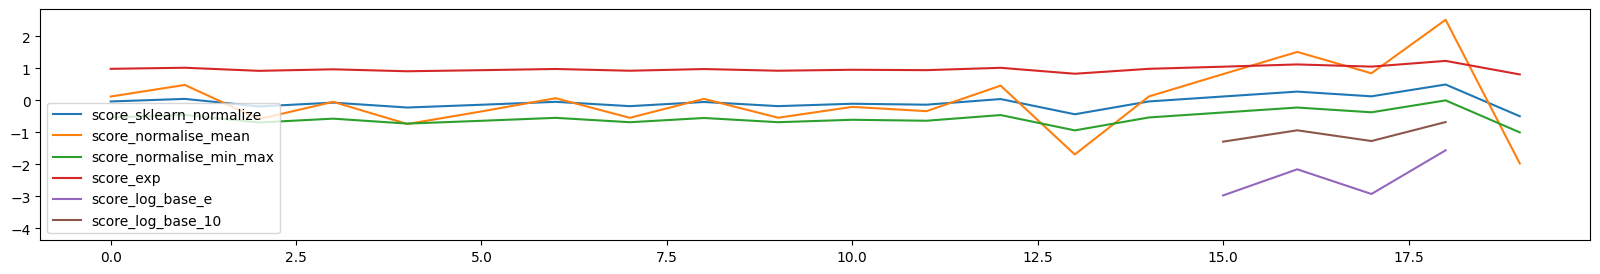

In [33]:
columns_to_show = ['score_sklearn_normalize', 'score_normalise_mean', 'score_normalise_min_max', 
                   'score_exp', 'score_log_base_e', 'score_log_base_10']
plt.plot(df[columns_to_show])
plt.legend(columns_to_show)

#### `score_normalise_mean` is a lot less smoother than `score_sklearn_normalize` or `score_normalise_min_max`, while the log variants are discontinuous. Although discontinuous, they do trace the deviations of the other plots.